# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [59]:
import pandas as pd

In [60]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1030,31,Private,93106,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
19424,33,Private,168981,Assoc-voc,11,Never-married,Prof-specialty,Unmarried,White,Female,0,0,55,United-States,<=50K
7767,47,Private,168195,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
887,33,Self-emp-inc,155781,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,?,<=50K
16973,26,Private,213625,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
20770,33,Private,232356,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1672,55,United-States,<=50K
3033,40,?,78255,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,25,United-States,<=50K
11619,51,Private,177727,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K
21659,38,Private,131808,Assoc-voc,11,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
24169,58,Self-emp-not-inc,163047,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [61]:
##importing the required library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [62]:
#Statistici descriptive
print(" Descriptive Statistics (Numerical Columns):")
display(data.describe())

 Descriptive Statistics (Numerical Columns):


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [63]:
#  Date lipsă
print("\n Missing Values Analysis:")
missing_count = data.isnull().sum()
missing_pct = (missing_count / len(data)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Percentage': missing_pct})
display(missing_df[missing_df['Missing Count'] > 0])





 Missing Values Analysis:


,Missing Count,Percentage



 Target Variable: Hours-per-Week


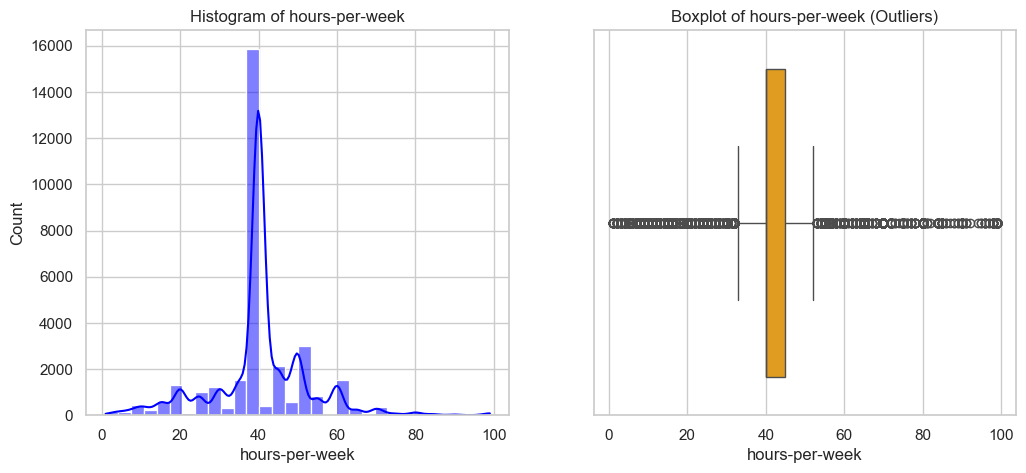

Observation: Most people work ~40 hours/week. Some outliers work <20h or >80h per week.


In [64]:
# Distribuția variabilei țintă (ore pe săptămână)
def plot_hist_box(df, column, color_hist='skyblue', color_box='orange'):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, color=color_hist, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color=color_box)
    plt.title(f'Boxplot of {column} (Outliers)')
    plt.show()

print("\n Target Variable: Hours-per-Week")
plot_hist_box(data, 'hours-per-week', 'blue', 'orange')
print("Observation: Most people work ~40 hours/week. Some outliers work <20h or >80h per week.")



 Outliers Check: Age


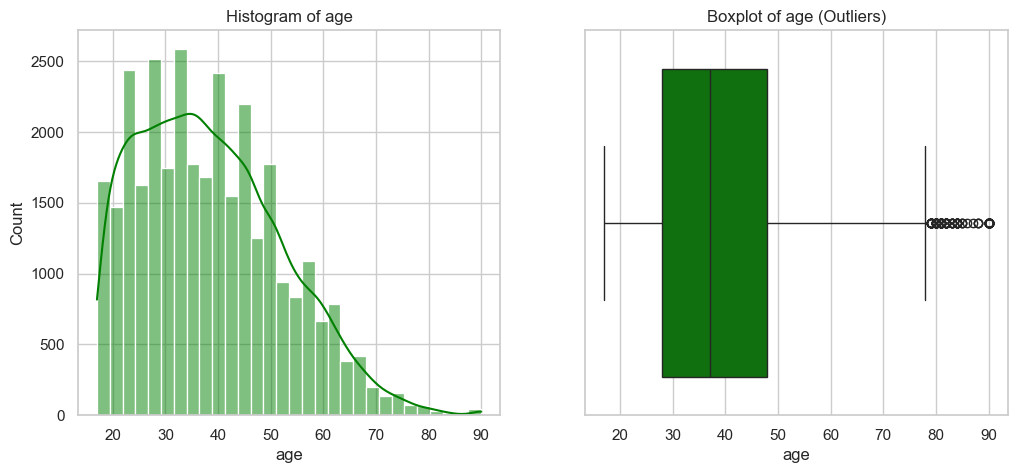

Observation: Age distribution is mostly between 20-60, few extreme ages.


In [65]:
#  Valori extreme într-o altă coloană numerică (vârstă)
print("\n Outliers Check: Age")
plot_hist_box(data, 'age', 'green', 'green')
print("Observation: Age distribution is mostly between 20-60, few extreme ages.")



 Correlation Matrix (Numerical Columns)


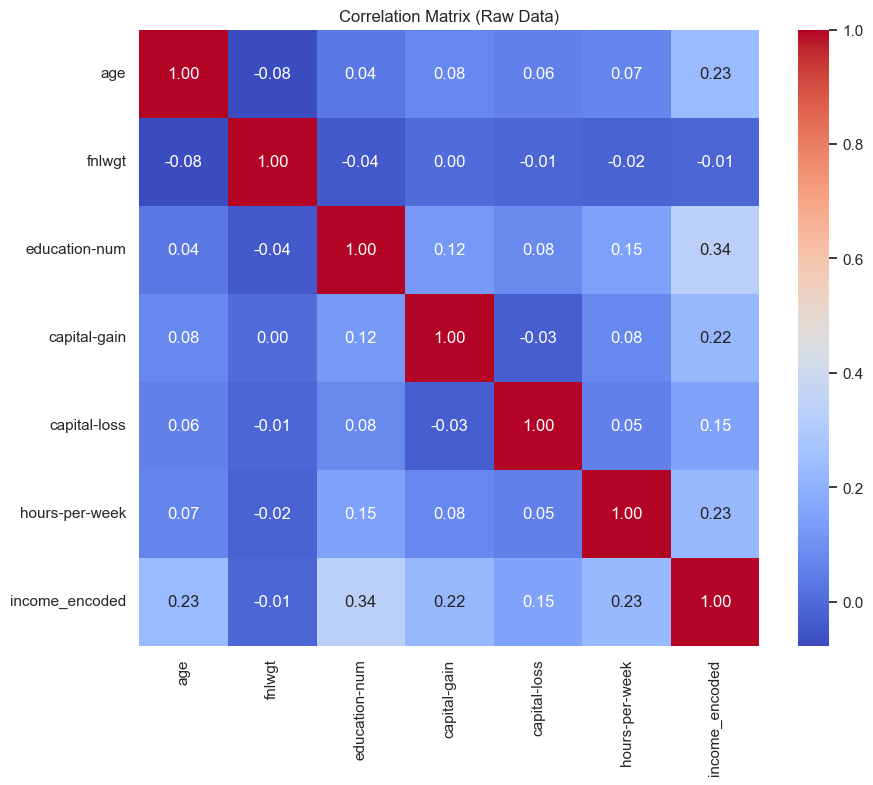

In [66]:
# Matrice de corelație
print("\n Correlation Matrix (Numerical Columns)")
data_corr = data.copy()
data_corr['income_encoded'] = data_corr['income'].apply(lambda x: 1 if x == '>50K' else 0)
numeric_df = data_corr.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Raw Data)')
plt.show()


In [67]:
# Rezumat pentru datele brute
print("\nSummary Observations (Raw Data):")
print("""
- Most people work around 40 hours/week.
- Hours-per-week is slightly right-skewed; few people work extreme hours.
- Age mostly ranges from 20-60 with few extreme values.
- Missing values exist in 'workclass', 'occupation', and 'native-country'.
- Income shows moderate correlation with hours-per-week (~0.15), while education-num and age are also slightly correlated.
""")


Summary Observations (Raw Data):

- Most people work around 40 hours/week.
- Hours-per-week is slightly right-skewed; few people work extreme hours.
- Age mostly ranges from 20-60 with few extreme values.
- Missing values exist in 'workclass', 'occupation', and 'native-country'.
- Income shows moderate correlation with hours-per-week (~0.15), while education-num and age are also slightly correlated.



In [68]:
df_proc = data.copy()

In [69]:
#Codificare simplă a coloanelor categorice în valori numerice
categorical_cols = df_proc.select_dtypes(include='object').columns
for col in categorical_cols:
    df_proc[col] = df_proc[col].astype('category').cat.codes


C:\Users\User\AppData\Local\Temp\ipykernel_16828\3967786122.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df_proc.select_dtypes(include='object').columns


In [70]:
# Înlocuim valorile lipsă cu -1
df_proc.fillna(-1, inplace=True)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [71]:
# Statistici descriptive
print("\n Descriptive Statistics (Preprocessed):")
display(df_proc.describe())



 Descriptive Statistics (Preprocessed):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000



 Target Variable: Hours-per-Week (Preprocessed Data)


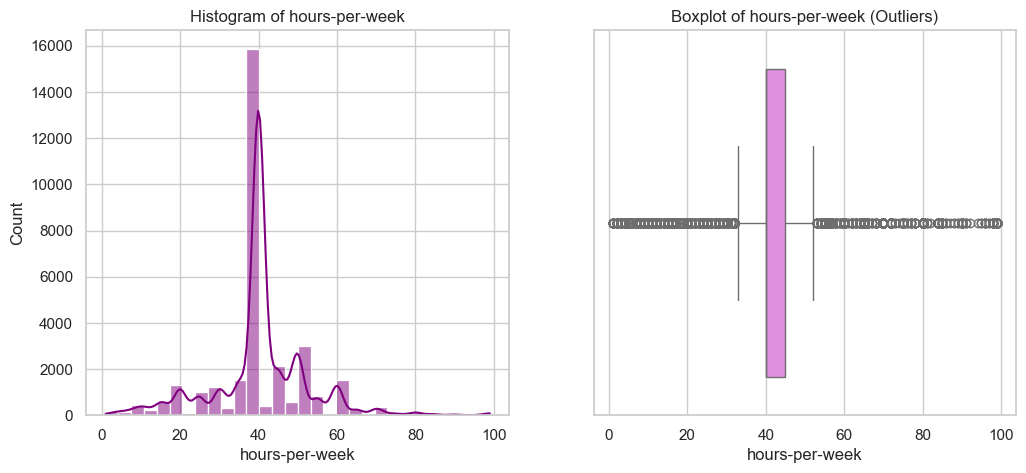

In [72]:
# 2.Distribuția variabilei țintă (ore lucrate pe săptămână)
print("\n Target Variable: Hours-per-Week (Preprocessed Data)")
plot_hist_box(df_proc, 'hours-per-week', 'purple', 'violet')


In [73]:
# 3. Corelații
print("\n Correlation with Hours-per-Week")
corr_matrix = df_proc.corr()
target_corr = corr_matrix['hours-per-week'].sort_values(ascending=False)

print("Top 5 Features Positively Correlated with Hours-per-Week:")
print(target_corr.head(6))

print("\nTop 5 Features Negatively Correlated with Hours-per-Week:")
print(target_corr.tail(5))



 Correlation with Hours-per-Week
Top 5 Features Positively Correlated with Hours-per-Week:
hours-per-week    1.000000
income            0.229689
sex               0.229309
education-num     0.148123
workclass         0.138962
occupation        0.080383
Name: hours-per-week, dtype: float64

Top 5 Features Negatively Correlated with Hours-per-Week:
race              0.041910
native-country   -0.002671
fnlwgt           -0.018768
marital-status   -0.190519
relationship     -0.248974
Name: hours-per-week, dtype: float64


In [74]:
# 4. Rezumat pentru datele preprocesate
print("\nSummary Observations (Preprocessed Data):")
print("""
-The distribution of hours worked per week is similar to that of the raw data (~40 hours/week).
-Some numeric columns now encode categorical variables, allowing clearer correlations.
-The correlations show which numeric variables have the most influence on hours-per-week.
-Preprocessing does not change the overall structure of the data but helps for subsequent modeling.
""")


Summary Observations (Preprocessed Data):

-The distribution of hours worked per week is similar to that of the raw data (~40 hours/week).
-Some numeric columns now encode categorical variables, allowing clearer correlations.
-The correlations show which numeric variables have the most influence on hours-per-week.
-Preprocessing does not change the overall structure of the data but helps for subsequent modeling.

